# Import Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]
import seaborn as sns
import numpy as np

# Load Datasets

In [2]:
df_building = pd.read_csv("/content/UCD_electricity_buildings.csv")
df_campus = pd.read_csv("/content/UCD_electricity_campus.csv")

# Part 1 - Data Wrangling

## 1.1 Read the general information from the dataframe

In [3]:
df_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155936 entries, 0 to 1155935
Data columns (total 12 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   timestamp                           1155936 non-null  object 
 1   electricity_consumption             1155936 non-null  float64
 2   building                            1155936 non-null  object 
 3   light_lux                           1138770 non-null  float64
 4   outside_temperature                 1140697 non-null  float64
 5   relative_humidity                   1140697 non-null  float64
 6   area                                1155936 non-null  int64  
 7   CO2e_emission                       1155936 non-null  float64
 8   cost                                1155936 non-null  float64
 9   normalized_electricity_consumption  1155936 non-null  float64
 10  normalized_cost                     1155936 non-null  float64
 11  normalized_

In [4]:
df_campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132336 entries, 0 to 132335
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   timestamp                132336 non-null  object 
 1   electricity_consumption  132336 non-null  float64
 2   campus                   132336 non-null  object 
 3   light_lux                130426 non-null  float64
 4   outside_temperature      130642 non-null  float64
 5   relative_humidity        130642 non-null  float64
 6   CO2e_emission            132336 non-null  float64
 7   cost                     132336 non-null  float64
dtypes: float64(6), object(2)
memory usage: 8.1+ MB


## 1.2 Check Missing Values

In [5]:
df_building.isnull().sum()/len(df_building)

timestamp                             0.000000
electricity_consumption               0.000000
building                              0.000000
light_lux                             0.014850
outside_temperature                   0.013183
relative_humidity                     0.013183
area                                  0.000000
CO2e_emission                         0.000000
cost                                  0.000000
normalized_electricity_consumption    0.000000
normalized_cost                       0.000000
normalized_CO2e                       0.000000
dtype: float64

In [6]:
df_campus.isnull().sum()/len(df_campus)

timestamp                  0.000000
electricity_consumption    0.000000
campus                     0.000000
light_lux                  0.014433
outside_temperature        0.012801
relative_humidity          0.012801
CO2e_emission              0.000000
cost                       0.000000
dtype: float64

In [8]:
df_building.describe(datetime_is_numeric = True)

,electricity_consumption,light_lux,outside_temperature,relative_humidity,area,CO2e_emission,cost,normalized_electricity_consumption,normalized_cost,normalized_CO2e
count,1.155936e+06,1.138770e+06,1.140697e+06,1.140697e+06,1.155936e+06,1.155936e+06,1.155936e+06,1.155936e+06,1.155936e+06,1.155936e+06
mean,4.414203e+01,8.568972e+03,1.153650e+01,3.165804e+01,7.924337e+03,2.317457e+01,6.555091e+00,1.011724e-02,1.502409e-03,5.311548e-03
std,5.323303e+01,1.751622e+04,4.890951e+00,3.937736e+01,7.240226e+03,2.794734e+01,7.905105e+00,1.911149e-02,2.838057e-03,1.003353e-02
min,-9.708000e+01,0.000000e+00,-3.460595e+00,6.791014e-04,8.930000e+02,-5.096700e+01,-1.441638e+01,-9.822928e-03,-1.458705e-03,-5.157037e-03
25%,1.000500e+01,8.206981e+01,7.967519e+00,1.659181e-01,1.935000e+03,5.252625e+00,1.485742e+00,2.617237e-03,3.886596e-04,1.374049e-03
50%,2.291750e+01,2.516343e+02,1.142939e+01,1.980283e-01,5.617000e+03,1.203169e+01,3.403249e+00,4.511822e-03,6.700056e-04,2.368707e-03
75%,6.402750e+01,9.073694e+03,1.502086e+01,7.526527e+01,1.052900e+04,3.361444e+01,9.508083e+00,8.452460e-03,1.255190e-03,4.437542e-03
max,4.239525e+02,1.032404e+05,3.046283e+01,9.984229e+01,2.528800e+04,2.225751e+02,6.295694e+01,1.479003e-01,2.196320e-02,7.764767e-02


## 1.3 Check Outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f50d5020850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f50d5025910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f50d502e950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f50d502e410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f50d5020e50>,
  <matplotlib.lines.Line2D at 0x7f50d50253d0>]}

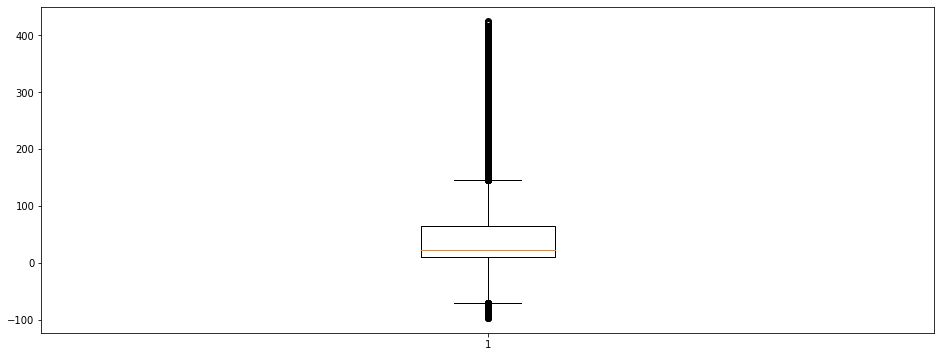

In [18]:
plt.boxplot(df_building["electricity_consumption"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text major ticklabel objects>)

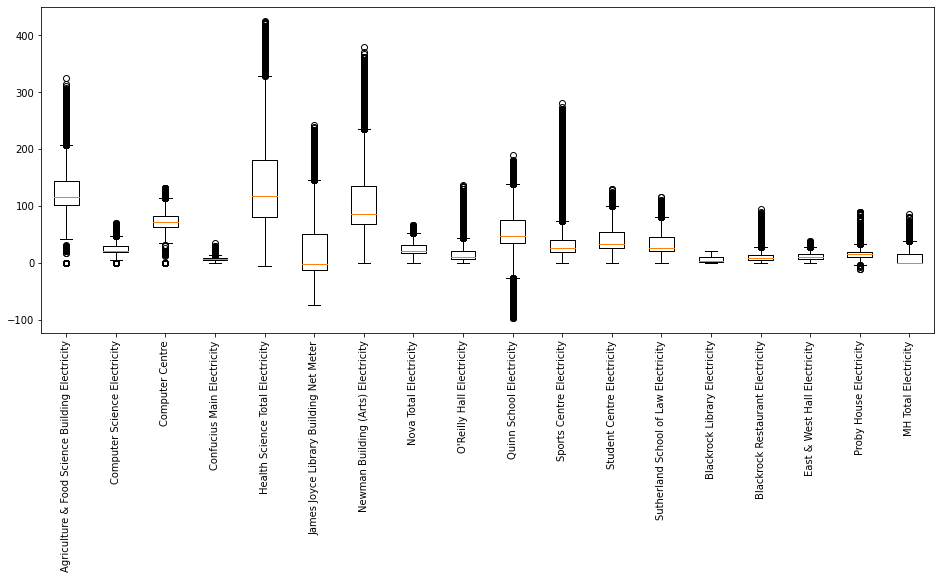

In [12]:
data = []
buildings = df_building["building"].unique()

for building in buildings:
  data.append(df_building[df_building["building"]==building].electricity_consumption)

plt.boxplot(data, labels=buildings)
plt.xticks(rotation=90)

{'boxes': [<matplotlib.lines.Line2D at 0x7f50d4c47610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f50d4bcb610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f50d4bd2650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f50d4bd2110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f50d4c47b50>,
  <matplotlib.lines.Line2D at 0x7f50d4bcb0d0>]}

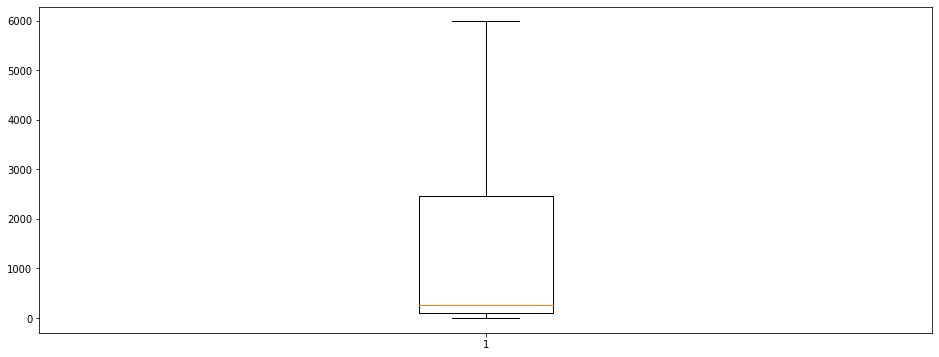

In [25]:
plt.boxplot(df_campus["electricity_consumption"])

(array([1, 2]), <a list of 2 Text major ticklabel objects>)

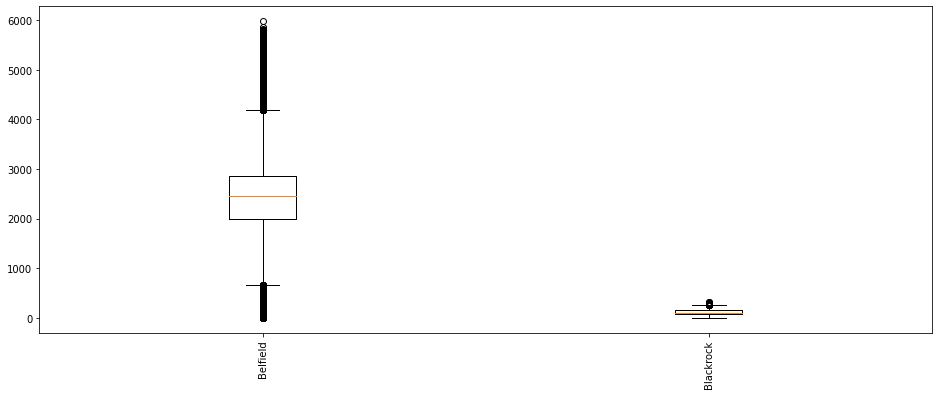

In [27]:
data = []
campuses = df_campus["campus"].unique()

for campus in campuses:
  data.append(df_campus[df_campus["campus"]==campus].electricity_consumption)

plt.boxplot(data, labels=campuses)
plt.xticks(rotation=90)

# Part 2 - Exploratory Data Analysis (EDA)

## 2.1 Check Unique Values

In [ ]:
df_building["building"].unique()

array(['Agriculture & Food Science Building Electricity',
       'Computer Science Electricity', 'Computer Centre',
       'Confucius Main Electricity', 'Health Science Total Electricity',
       'James Joyce Library Building Net Meter',
       'Newman Building (Arts) Electricity', 'Nova Total Electricity',
       "O'Reilly Hall Electricity", 'Quinn School Electricity',
       'Sports Centre Electricity', 'Student Centre Electricity',
       'Sutherland School of Law Electricity',
       'Blackrock Library Electricity',
       'Blackrock Restaurant Electricity', 'East & West Hall Electricity',
       'Proby House Electricity', 'MH Total Electricity'], dtype=object)

In [19]:
df_campus["campus"].unique()

array(['Belfield', 'Blackrock'], dtype=object)

## 2.2 Check Distributions

(array([1.46000e+02, 2.73000e+02, 4.55000e+02, 1.92800e+03, 1.92300e+03,
        7.38100e+03, 1.03540e+04, 2.01506e+05, 2.93717e+05, 1.63525e+05,
        8.99870e+04, 6.75730e+04, 6.81480e+04, 6.11890e+04, 4.14910e+04,
        3.29730e+04, 2.75220e+04, 1.65170e+04, 1.21210e+04, 9.75800e+03,
        7.99100e+03, 6.95300e+03, 6.08000e+03, 5.20400e+03, 4.27900e+03,
        3.42400e+03, 2.90000e+03, 2.50100e+03, 2.10700e+03, 1.33700e+03,
        8.76000e+02, 7.23000e+02, 6.24000e+02, 6.14000e+02, 5.49000e+02,
        5.40000e+02, 3.85000e+02, 2.59000e+02, 8.30000e+01, 2.00000e+01]),
 array([-97.07999992, -84.05418777, -71.02837563, -58.00256348,
        -44.97675133, -31.95093918, -18.92512703,  -5.89931488,
          7.12649727,  20.15230942,  33.17812157,  46.20393372,
         59.22974586,  72.25555801,  85.28137016,  98.30718231,
        111.33299446, 124.35880661, 137.38461876, 150.41043091,
        163.43624306, 176.46205521, 189.48786736, 202.5136795 ,
        215.53949165, 228.5653

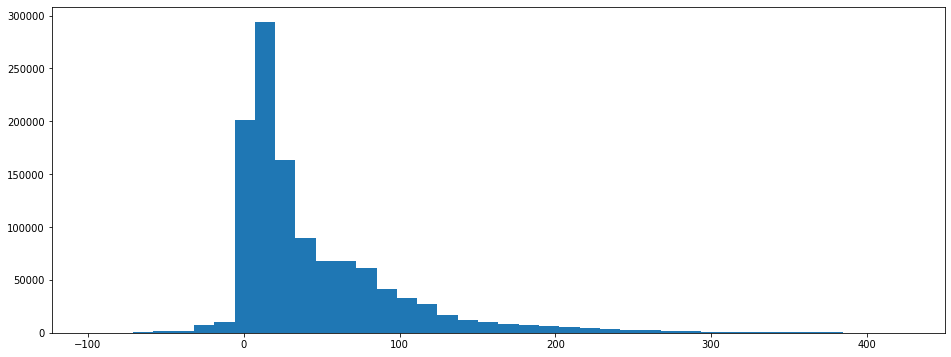

In [23]:
plt.hist(df_building["electricity_consumption"], bins = 40)

(array([5.0064e+04, 1.7137e+04, 2.7100e+02, 3.6900e+02, 6.1100e+02,
        5.9500e+02, 7.4100e+02, 7.8500e+02, 1.1230e+03, 1.9090e+03,
        2.3590e+03, 2.8990e+03, 3.0650e+03, 3.1270e+03, 4.2870e+03,
        6.5320e+03, 7.4770e+03, 6.9190e+03, 4.9540e+03, 2.8320e+03,
        1.9980e+03, 1.7920e+03, 1.5190e+03, 1.4480e+03, 1.3390e+03,
        1.1770e+03, 9.1800e+02, 8.8100e+02, 7.9900e+02, 6.0200e+02,
        4.8500e+02, 4.3500e+02, 3.1400e+02, 2.3400e+02, 1.6100e+02,
        8.3000e+01, 3.6000e+01, 3.0000e+01, 2.7000e+01, 2.0000e+00]),
 array([   0.   ,  149.575,  299.15 ,  448.725,  598.3  ,  747.875,
         897.45 , 1047.025, 1196.6  , 1346.175, 1495.75 , 1645.325,
        1794.9  , 1944.475, 2094.05 , 2243.625, 2393.2  , 2542.775,
        2692.35 , 2841.925, 2991.5  , 3141.075, 3290.65 , 3440.225,
        3589.8  , 3739.375, 3888.95 , 4038.525, 4188.1  , 4337.675,
        4487.25 , 4636.825, 4786.4  , 4935.975, 5085.55 , 5235.125,
        5384.7  , 5534.275, 5683.85 , 5833.425

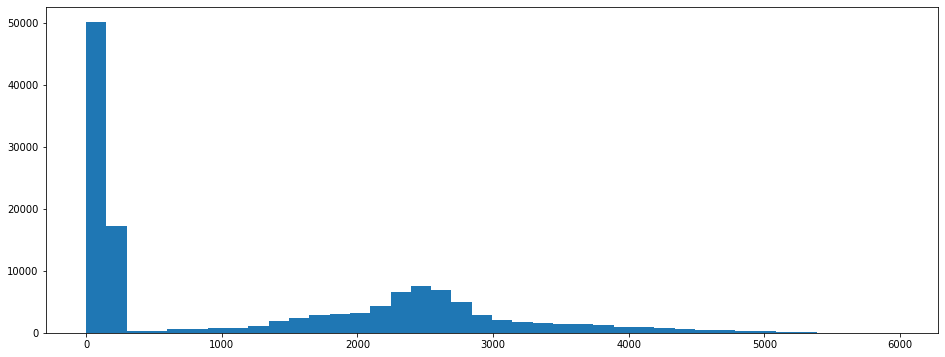

In [24]:
plt.hist(df_campus["electricity_consumption"], bins = 40)

## 2.3 Check Correlations

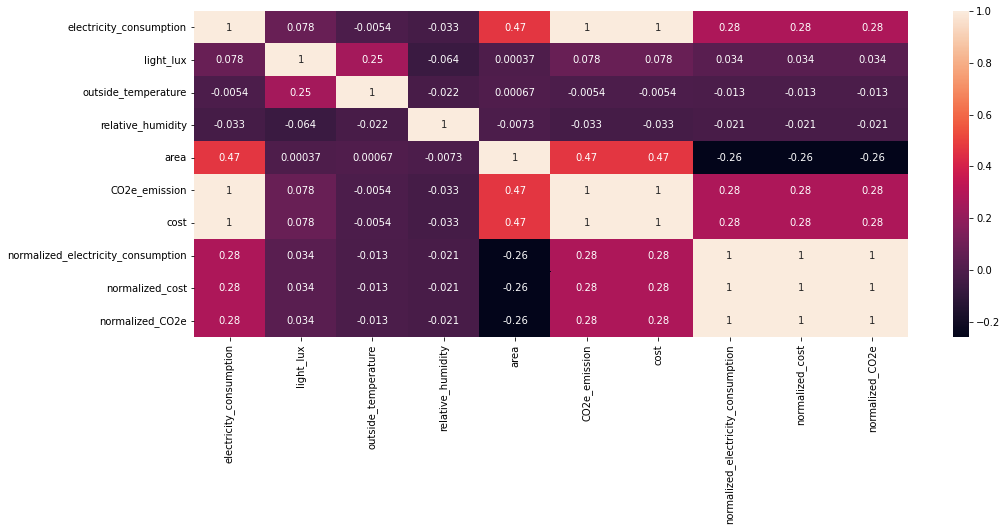

In [ ]:
sns.heatmap(df_building.corr(), annot=True)

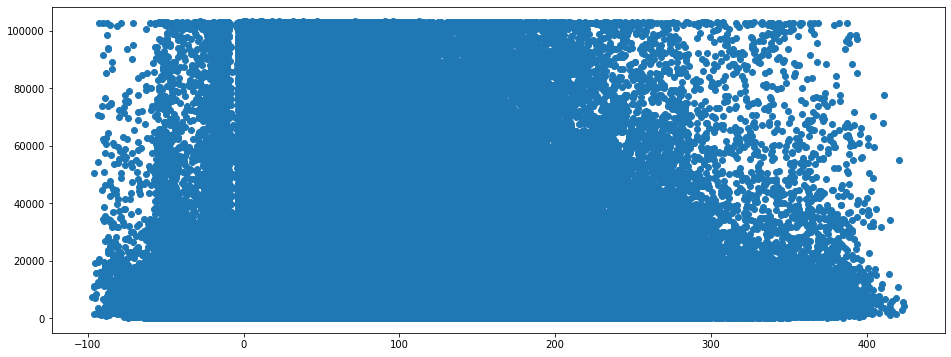

In [28]:
plt.plot(df_building["electricity_consumption"], df_building["light_lux"], "o")

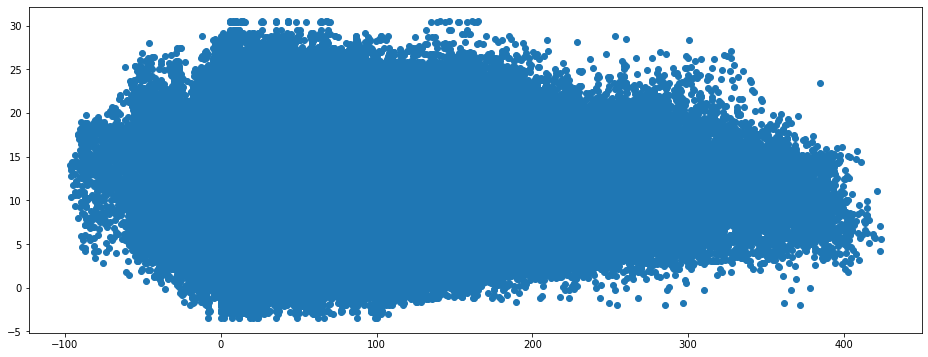

In [30]:
plt.plot(df_building["electricity_consumption"], df_building["outside_temperature"], "o")

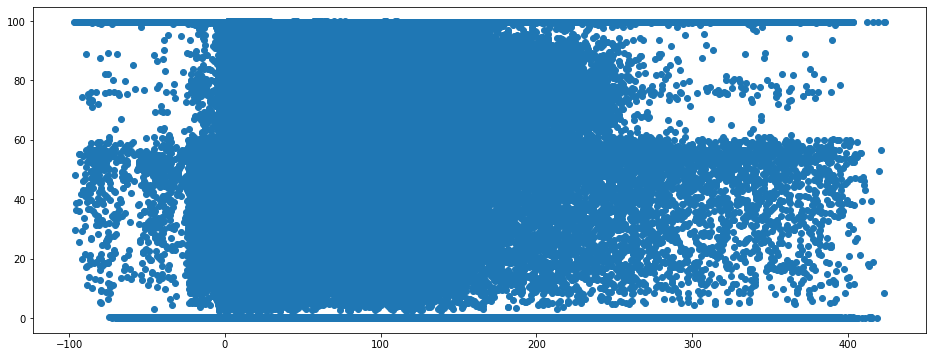

In [32]:
plt.plot(df_building["electricity_consumption"], df_building["relative_humidity"], "o")

<BarContainer object of 18 artists>

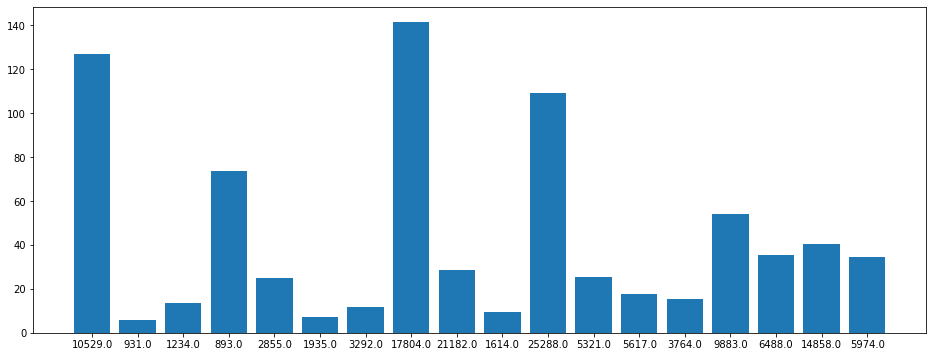

In [45]:
plt.bar(df_building.groupby("building")["area"].mean().values.astype(str), df_building.groupby("building")["electricity_consumption"].mean().values)

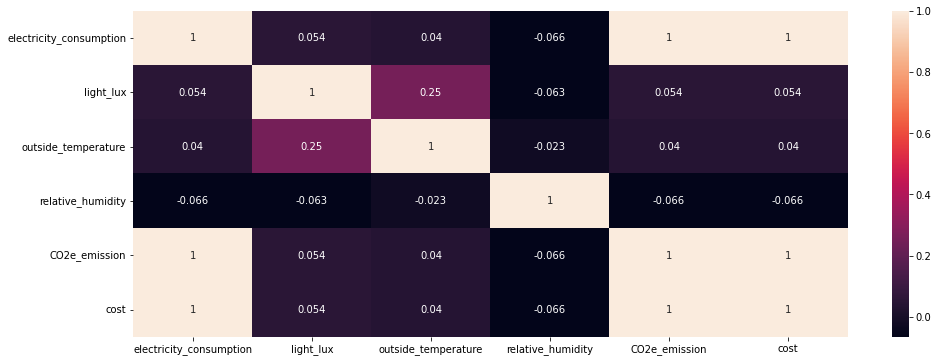

In [29]:
sns.heatmap(df_campus.corr(), annot=True)

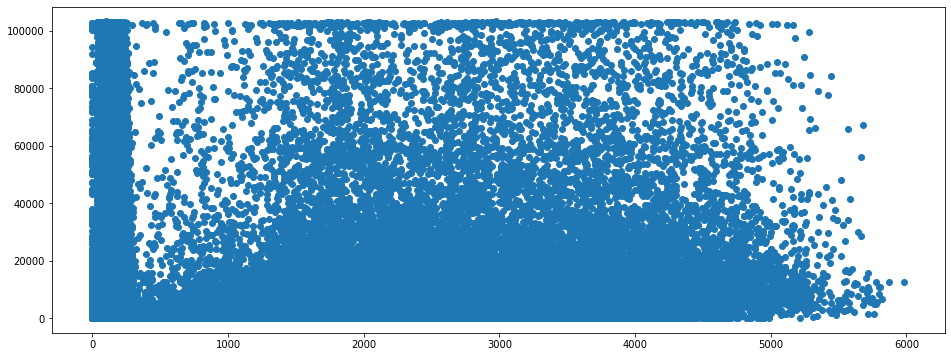

In [48]:
plt.plot(df_campus["electricity_consumption"], df_campus["light_lux"], "o")

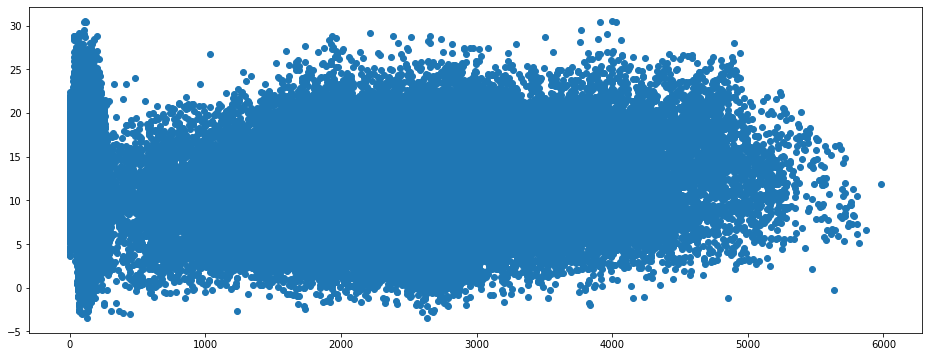

In [49]:
plt.plot(df_campus["electricity_consumption"], df_campus["outside_temperature"], "o")

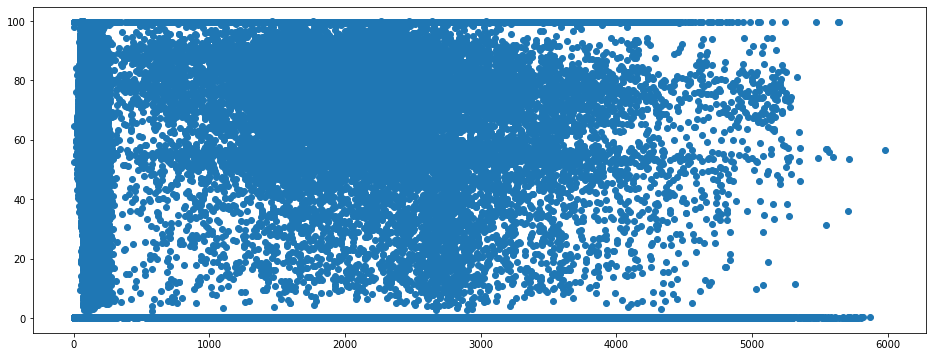

In [50]:
plt.plot(df_campus["electricity_consumption"], df_campus["relative_humidity"], "o")

## 2.4 Add new features and check correlations

In [60]:
df_building["timestamp"] = pd.to_datetime(df_building["timestamp"])
df_building["year"] = df_building["timestamp"].dt.year
df_building["month"] = df_building["timestamp"].dt.month
df_building["day"] = df_building["timestamp"].dt.day
df_building["hour"] = df_building["timestamp"].dt.hour
df_building["day_of_week"] = df_building["timestamp"].dt.dayofweek

<BarContainer object of 8 artists>

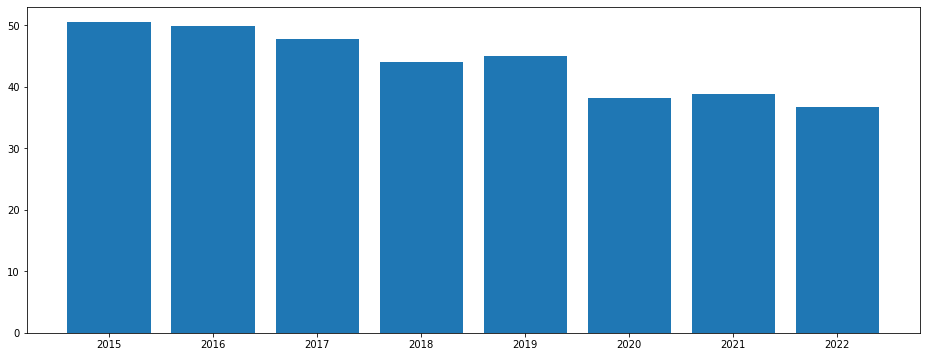

In [61]:
plt.bar(df_building.groupby("year")["electricity_consumption"].mean().index, df_building.groupby("year")["electricity_consumption"].mean().values)

<BarContainer object of 12 artists>

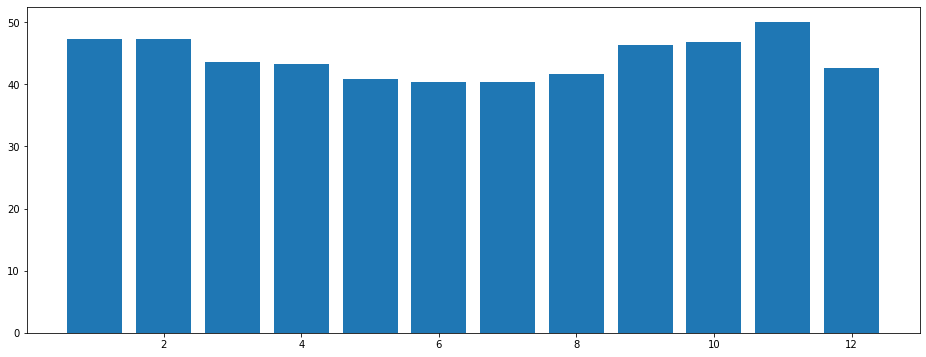

In [62]:
plt.bar(df_building.groupby("month")["electricity_consumption"].mean().index, df_building.groupby("month")["electricity_consumption"].mean().values)

<BarContainer object of 31 artists>

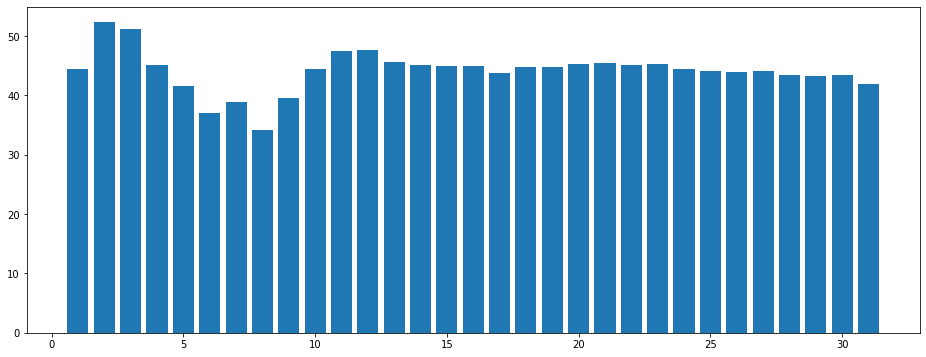

In [63]:
plt.bar(df_building.groupby("day")["electricity_consumption"].mean().index, df_building.groupby("day")["electricity_consumption"].mean().values)

<BarContainer object of 24 artists>

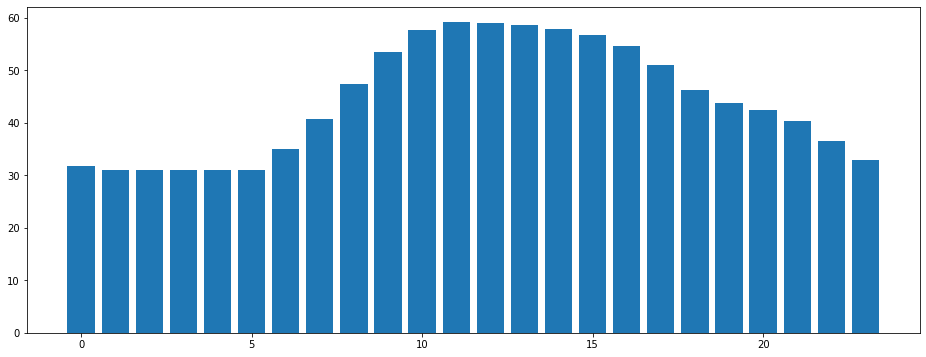

In [64]:
plt.bar(df_building.groupby("hour")["electricity_consumption"].mean().index, df_building.groupby("hour")["electricity_consumption"].mean().values)

<BarContainer object of 7 artists>

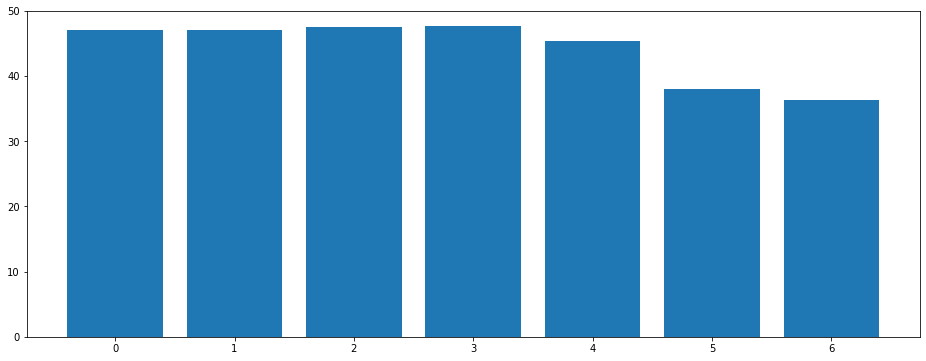

In [65]:
plt.bar(df_building.groupby("day_of_week")["electricity_consumption"].mean().index, df_building.groupby("day_of_week")["electricity_consumption"].mean().values)